Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.


In practice the k points aren't chosen randomly, there are some clever algorithms we can use to best guess where the centers should be. For the sake of demonstration, it doesn't matter whether the points are chosen randomly or not. You can read more about this in the scikit-learn User Guide. ↩

Usually this is calculating the change in inertia from one iteration to the next. If the change is less than some tolerance, than we are done. ↩

In our example, we created the clusters based only on 2 dimensions, so visualizing the results of our clustering is relatively easy. In practice, clusters might be based on many more than 2 dimensions. In this case, we could various combinations of 2 dimensions that the clustering was based on and visualize the results. ↩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
#load data from seaborn
iris = sns.load_dataset('iris')
# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=42)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=42)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [5]:
X = train_scaled[['petal_length', 'sepal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_length,sepal_length
0,1.027398,1.223146
1,-1.225968,-1.008336
2,0.428182,0.037063


In [7]:
kmeans.labels_.shape

(121,)

In [8]:
train['cluster'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,4.9,3.0,1.4,0.2,setosa,1
133,6.3,2.8,5.1,1.5,virginica,2
95,5.7,3.0,4.2,1.2,versicolor,2
132,6.4,2.8,5.6,2.2,virginica,0
125,7.2,3.2,6.0,1.8,virginica,0
...,...,...,...,...,...,...
114,5.8,2.8,5.1,2.4,virginica,2
41,4.5,2.3,1.3,0.3,setosa,1
30,4.8,3.1,1.6,0.2,setosa,1
100,6.3,3.3,6.0,2.5,virginica,0


In [11]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.862857,3.068571,5.605714,1.962857
1,4.988636,3.365909,1.590909,0.302273
2,5.866667,2.773810,4.538095,1.519048


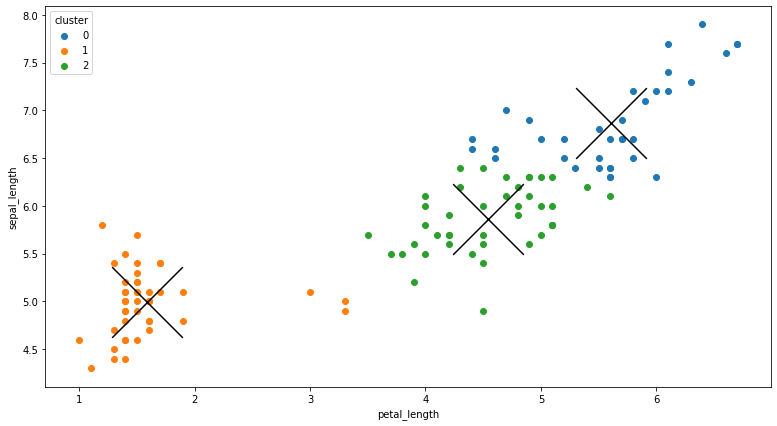

In [17]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='petal length', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')

In [18]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

8734527.407634938

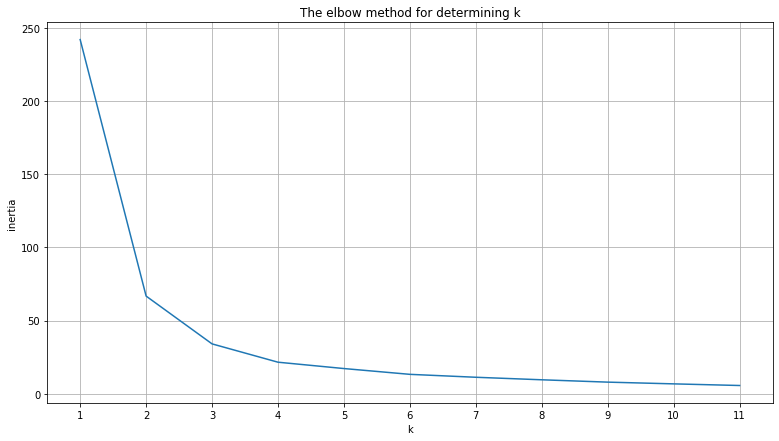

In [19]:
# elbow method
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

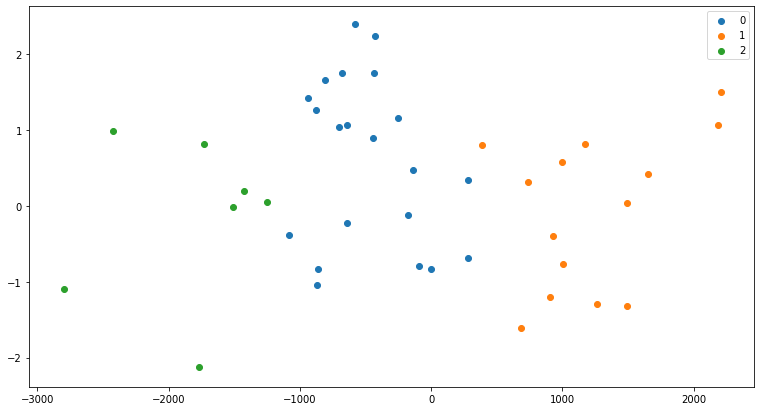

In [20]:
np.random.seed(123)

df = pd.DataFrame({
    'x': np.random.randn(42) * 1000,
    'y': np.random.randn(42),
})

kmeans = KMeans(n_clusters=3).fit(df)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(13, 7))
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.x, subset.y, label=cluster)
plt.legend()